# Homework 2 - Gradient Descent
Due Date - Monday 9th February (11:59 PM)

In [12]:
# Imports
import numpy as np  # arrays, vectorized math
import pandas as pd  # tabular data handling (not heavily used here but students should familiarize themselves with this)
import matplotlib.pyplot as plt  # plotting
from sklearn.linear_model import LinearRegression  # ready-made linear regression

rng = np.random.default_rng(42)  # reproducible randomness

## Synthetic Data
We will create noisy linear data so we know the true relationship. 
Do not modify this cell

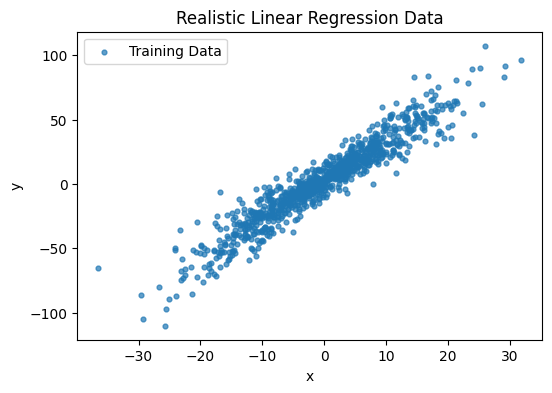

Number of Data Points = 1000
Mean of X = -0.289
Standard Deviation of X = 9.887


In [13]:
# Realistic linear regression dataset for optimizer comparisons
# - Standardized feature (stable gradients across learning rates)
# - Heteroscedastic Gaussian noise that grows with |x|
# - Sparse outliers to reveal optimizer robustness

n = 1000
x_raw = rng.normal(0.0, 10.0, size=n)

beta0, beta1 = 4.0, 3.0

# Base noise: variance increases with |x|
sigma = 2 + 0.5 * np.abs(x_raw)
noise = rng.normal(0.0, sigma, size=n)

# Inject a few outliers
outlier_idx = rng.choice(n, size=int(0.5 * n), replace=False)
noise[outlier_idx] += rng.normal(0.0, 8.0, size=outlier_idx.size)

# Linear relationship
y = beta0 + beta1 * x_raw + noise

# Visualize
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x_raw, y, s=12, alpha=0.7, label='Training Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Realistic Linear Regression Data')
ax.legend()
plt.show()

# Quick summary
print(f'Number of Data Points = {n}\nMean of X = {x_raw.mean():.3f}\nStandard Deviation of X = {x_raw.std():.3f}')

# Feature Normalization

# Question 1 (12 Points in total) 
Normalize the input data using Mean-Variance Normalization and Min-Max Normalization. Print the mean and standard deviation (for Mean-Variance Normalization) and min and max (for Min-Max Normalization) of the normalized data.

Min-Max Normalization = $x \leftarrow \frac{x - min(x)}{max(x) - min(x)}$


Mean Variance Normalization = $x \leftarrow \frac{x - mean(x)}{std(x)}$


In [14]:
###############################################
############## Question 1(a) ##################
################# 5 points ####################
###############################################

# TODO: Write your code to to perform min max normalization on x_raw

################################################
########## Write your answer here ##############    
################################################

# Use min-max normalization to normalize the input 
x_min_max = (x_raw - np.min(x_raw)) / (np.max(x_raw) - np.min(x_raw))

################################################
########## End of your answer ##################
################################################

print(f'Number of Data Points = {n}\nMean of X = {x_min_max.mean():.3f}\nStandard Deviation of X = {x_min_max.std():.3f}\nMin of X = {x_min_max.min():.3f}\nMax of X = {x_min_max.max():.3f}')

Number of Data Points = 1000
Mean of X = 0.530
Standard Deviation of X = 0.145
Min of X = 0.000
Max of X = 1.000


In [15]:
###############################################
############## Question 1(b) ##################
################# 5 points ####################
###############################################

# TODO: Write your code to to perform mean-variance normalization on x_raw

################################################
########## Write your answer here ##############    
################################################

x_mean_var = (x_raw - np.mean(x_raw)) / np.std(x_raw)

################################################
########## End of your answer ##################
################################################

print(f'Number of Data Points = {n}\nMean of X = {x_mean_var.mean():.3f}\nStandard Deviation of X = {x_mean_var.std():.3f}\nMin of X = {x_mean_var.min():.3f}\nMax of X = {x_mean_var.max():.3f}')

Number of Data Points = 1000
Mean of X = 0.000
Standard Deviation of X = 1.000
Min of X = -3.661
Max of X = 3.244


## Question 1(c) (2 Points) 

What difference do you see between min-max and mean-variance normalization? 

When do you think one would be better than the other? 

Enter you answer here

# Question 2 - Gradient Descent Optimizer Implementation (10 Points)

Given a linear regression model $\hat{y} = \theta_0 + \theta_1x$ and the mean squared error loss function, the gradients are given by:

$\frac{\partial L(\theta)}{\partial \theta_0} = \frac{2}{m}\sum_{i = 1}^m (\theta_0 + \theta_1 x_i - y_i)$

and 

$\frac{\partial L(\theta)}{\partial \theta_1} = \frac{2}{m}\sum_{i = 1}^m x_i \cdot (\theta_0 + \theta_1 x_i - y_i)$

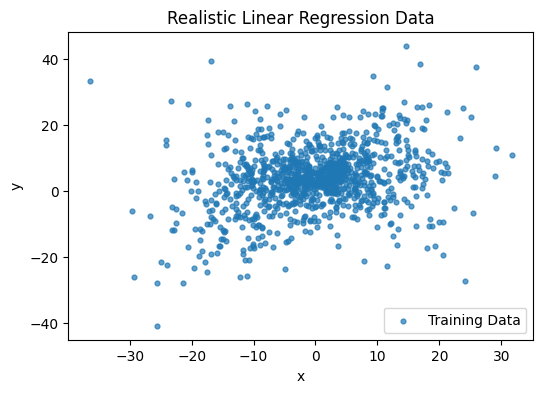

In [16]:
# For the remainder of this code, we will use mean-variance normalized x

# Update x to be mean-variance normalized version
x = x_mean_var

# Generate training data again for consistency
y = beta0 + beta1 * x + noise

# Visualize
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x_raw, y, s=12, alpha=0.7, label='Training Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Realistic Linear Regression Data')
ax.legend()
plt.show()

In [17]:
def mean_squared_error(y_true, y_pred):
    """Compute the Mean Squared Error between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)


###############################################
############### Question 2 ####################
###############################################

# TODO: We're going to use gradient descent to fit a linear model to this data.
# Fill in the code below using the equations defined above. 

################################################
########## Write your answer here ##############    
################################################


def run_gradient_descent(x, y, learning_rate = 1e-4, epochs=1000):
    """Run gradient descent to fit a simple linear regression model."""

    # Initialize parameters
    theta_0_gd = 0.0
    theta_1_gd = 0.0

    # Run gradient descent for simple linear regression
    m = len(x)
    loss_history = []

    for _ in range(epochs):

        # Define the model equation 
        y_pred = theta_0_gd + theta_1_gd * x

        # Error term for gradient calculation
        # This is not the loss term 
        error = y_pred - y

        # Gradients for intercept and slope (vectorized)
        grad_theta_0 = (2 / m) * np.sum(error)
        grad_theta_1 = (2 / m) * np.sum(error * x)
        
        # Update parameters
        theta_0_gd -= learning_rate * grad_theta_0
        theta_1_gd -= learning_rate * grad_theta_1

        ################################################
        ########## End of your answer ##################
        ################################################

        if _ % 50 == 0 or _ == epochs - 1:
            loss_history.append(mean_squared_error(y, y_pred))

    print ("==========================")
    print ("Learning Rate:", learning_rate)
    print(f"Slope (theta_1): {theta_1_gd:.3f}")
    print(f"Intercept (theta_0): {theta_0_gd:.3f}")
    print(f"MSE: {mean_squared_error(y, theta_0_gd + theta_1_gd * x):.3f}")
    print ("==========================")
    print ()
    
    return (theta_0_gd, theta_1_gd), np.arange(0, epochs, 50).tolist() + [epochs - 1], loss_history



Learning Rate: 1
Slope (theta_1): 0.000
Intercept (theta_0): 0.000
MSE: 109.131

Learning Rate: 0.1
Slope (theta_1): 2.770
Intercept (theta_0): 3.689
MSE: 87.850

Learning Rate: 0.01
Slope (theta_1): 2.770
Intercept (theta_0): 3.689
MSE: 87.850

Learning Rate: 0.001
Slope (theta_1): 2.396
Intercept (theta_0): 3.191
MSE: 88.238

Learning Rate: 0.0001
Slope (theta_1): 0.502
Intercept (theta_0): 0.669
MSE: 102.115

Learning Rate: 1e-05
Slope (theta_1): 0.055
Intercept (theta_0): 0.073
MSE: 108.297



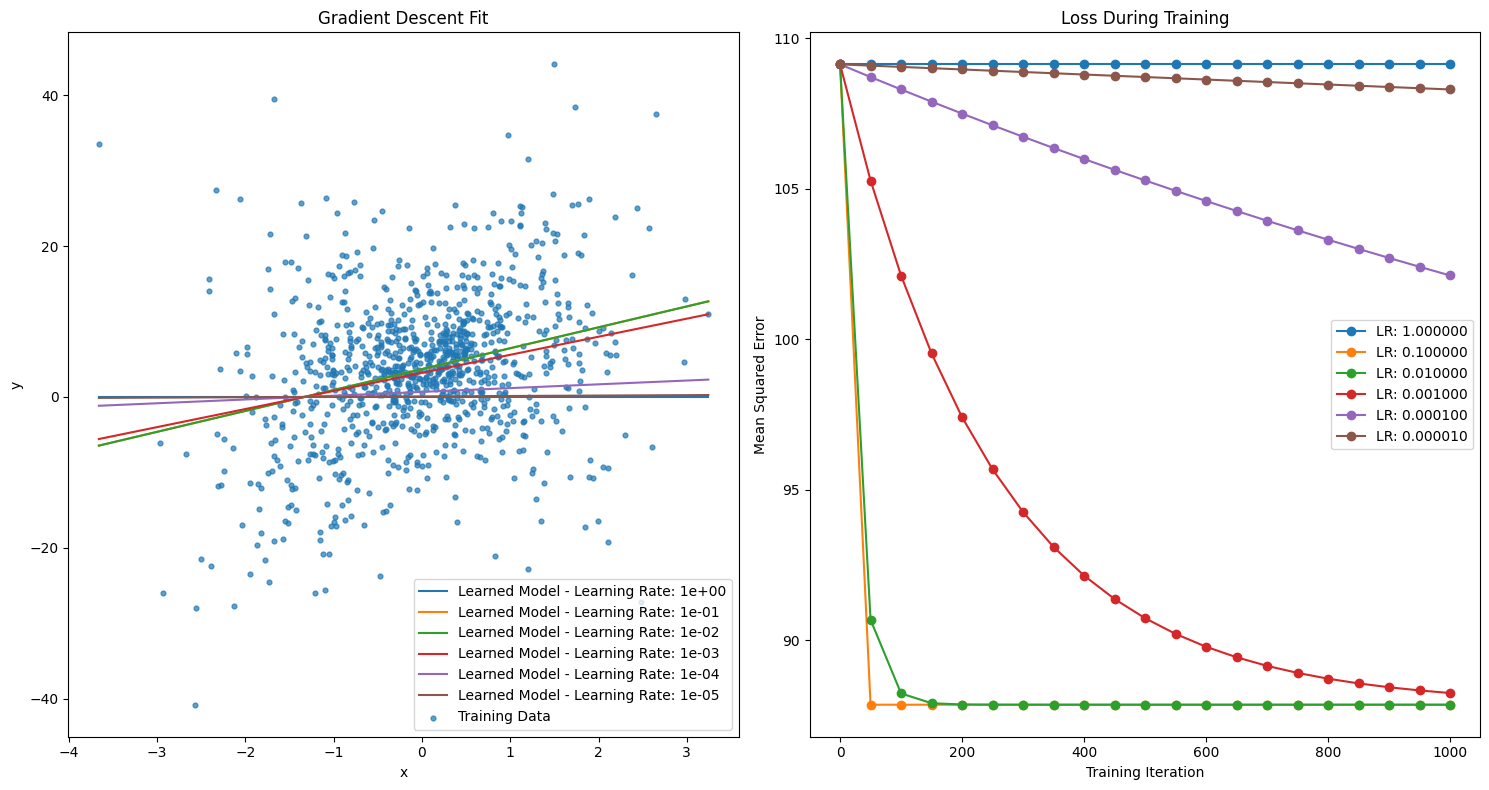

In [18]:
# Plot fit and loss curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

for lr in [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    (theta_0_gd, theta_1_gd), iter_history, loss_history = run_gradient_descent(x, y, learning_rate=lr, epochs=1000)
    ax1.plot(np.sort(x), (theta_0_gd + theta_1_gd * np.sort(x)), label="Learned Model - Learning Rate: {:.0e}".format(lr))
    ax2.plot(np.array(iter_history), loss_history, marker="o", label=f"LR: {lr:.6f}")

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.scatter(x, y, s=12, alpha=0.7, label='Training Data')

ax1.set_title("Gradient Descent Fit")
ax1.legend()

ax2.set_xlabel("Training Iteration")
ax2.set_ylabel("Mean Squared Error")
ax2.set_title("Loss During Training")
ax2.legend()
plt.tight_layout()
plt.show()

# Question 3 (4 points - 2 each)

3(a) What happens as you change the learning rate? What happens when the learning rate is high? What about when it is very small? 

3(b) Which learning rate seems optimal and why? 

Enter your answer here

3(a) - As learning rate goes down, the loss takes longer to reduce. At a high learning rate of 1, the loss does not seem to go down at all. At a very small learning rate, it goes down very slowly. 

3(b) - Looks like 1e-2 or 1e-1 might be the optimal value here since they both reach the minimum value of loss

## Question 4 (10 points) - Implement gradient descent with momentum 

If the gradient descent equation is given by $\theta_t = \theta_{t-1} - \alpha \nabla \ell_{\theta_{t-1}}$, then the momentum modified variant is given by 

$v_t = \beta \cdot v_{t-1} + \nabla \ell_{\theta_{t-1}}$

$\theta_t = \theta_{t-1} - \alpha \cdot v_{t}$

In [19]:
###############################################
############### Question 4 ####################
###############################################

# TODO: Use your gradient descent code from above and modify it to implement Momentum Gradient Descent.

################################################
########## Write your answer here ##############    
################################################

# Implement Momentum Gradient Descent
def run_gradient_descent_momentum(x, y, learning_rate, epochs, beta=0.9):

    # Run gradient descent for linear regression (matrix form) with momentum
    loss_history = []
    iter_history = []

    # Initialize velocity
    v_0 = 0.0
    v_1 = 0.0

    # Intialize parameters
    theta_0_gd = 0.0
    theta_1_gd = 0.0

    m = len(x)

    # Run gradient descent for  linear regression
    for t in range(epochs):

        # Define the model equation 
        y_pred = theta_0_gd + theta_1_gd * x

        # Error term for gradient calculation
        # This is not the loss term 
        error = y_pred - y
        
        # Gradients for intercept and slope (vectorized)
        grad_b0 = (2 / m) * np.sum(error)
        grad_b1 = (2 / m) * np.sum(error * x)

        # Update velocities 
        v_0 = beta * v_0 + grad_b0
        v_1 = beta * v_1 + grad_b1
        
        # Update parameters
        theta_0_gd -= learning_rate * v_0
        theta_1_gd -= learning_rate * v_1

        ################################################
        ########## End of your answer ##################
        ################################################

        # Track loss periodically
        if t % 50 == 0 or t == epochs - 1:
            loss_history.append(mean_squared_error(y, y_pred))
            iter_history.append(t)
            
    return (theta_0_gd, theta_1_gd), np.arange(0, epochs, 50).tolist() + [epochs - 1], loss_history

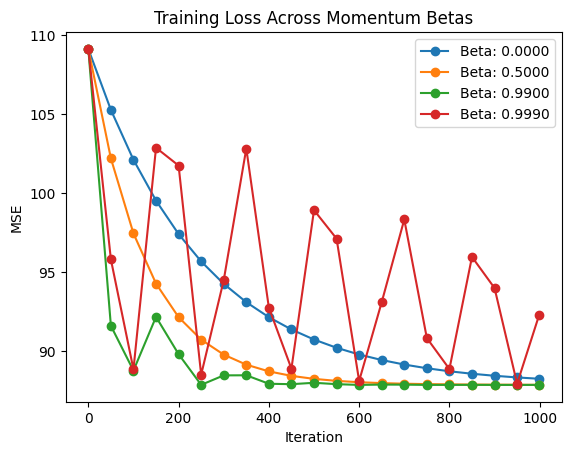

In [20]:
# Plot fit and loss curve
lr = 1e-3
for beta in [0, 0.5, 0.99, 0.999]:
    (theta_0_gd, theta_1_gd), iter_history, loss_history = run_gradient_descent_momentum(x, y, learning_rate=lr, epochs=1000, beta=beta)
    plt.plot(np.array(iter_history), loss_history, marker="o", label=f"Beta: {beta:.4f}")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Training Loss Across Momentum Betas")
plt.legend()
plt.show()

## Question 5 (6 points - 2 each)

5(a): What happens when $\beta = 0$?

5(b): What happens when we set a high value for $\beta$ at $\beta = 0.999$?

5(c): What seems like an optimal $\beta$ and why? Does this align with the expectation of what beta is supposed to do? 

Enter your answer here

5(a) - When $\beta=0$, we get back standard gradient descent and the loss goes down 

5(b) - When $\beta=0.999$ and is high, the momentum seems to cause the loss to bounce around and be unstable 

5(c) - Seems like $\beta=0.99$ is the ideal spot where the momentum causes loss to decay very quickly and then stabilize to a low value

## Question 6 (10 points) - Implement gradient descent with RMSProp 

If the gradient descent equation is given by $\theta_t = \theta_{t-1} - \alpha \nabla \ell_{\theta_{t-1}}$, then the RMSProp modified variant is given by 

$G_t = \beta \cdot G_{t - 1} + (1 - \beta) \cdot (\nabla \ell_{\theta_{t-1}})^2$

and

$\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{G_t} + \epsilon} \cdot \nabla \ell_{\theta_{t-1}}$

In [21]:
###############################################
############### Question 6 ####################
###############################################

# TODO: Use your gradient descent code from above and modify it to implement RMSProp Gradient Descent.

################################################
########## Write your answer here ##############    
################################################

# Implement RMSProp Gradient Descent
def run_gradient_descent_rmsprop(x, y, learning_rate, epochs, beta=0.9, epsilon=1e-8):

    epsilon = 1e-6
    
    # Run gradient descent for linear regression (matrix form) with RMSProp
    loss_history = []
    iter_history = []

    # Initialize tracking terms for RMSProp
    g_0 = 1.0
    g_1 = 1.0

    # Intialize parameters
    theta_0_gd = 0.0
    theta_1_gd = 0.0

    m = len(x)

    # Run gradient descent for  linear regression
    for t in range(epochs):

        # Define the model equation 
        y_pred = theta_0_gd + theta_1_gd * x

        # Error term for gradient calculation
        # This is not the loss term 
        error = y_pred - y
        
        # Gradients for intercept and slope (vectorized)
        grad_b0 = (2 / m) * np.sum(error)
        grad_b1 = (2 / m) * np.sum(error * x)

        # Update tracking terms for RMSProp
        g_0 = beta * g_0 + ((1 - beta) * grad_b0**2)
        g_1 = beta * g_1 + ((1 - beta) * grad_b1**2)
        
        # Update parameters
        theta_0_gd -= (learning_rate / (np.sqrt(g_0) + epsilon)) * grad_b0
        theta_1_gd -= (learning_rate / (np.sqrt(g_1) + epsilon)) * grad_b1

        ################################################
        ########## End of your answer ##################
        ################################################


        # Track loss periodically
        if t % 50 == 0 or t == epochs - 1:
            loss_history.append(mean_squared_error(y, y_pred))
            iter_history.append(t)
            
    return (theta_0_gd, theta_1_gd), np.arange(0, epochs, 50).tolist() + [epochs - 1], loss_history

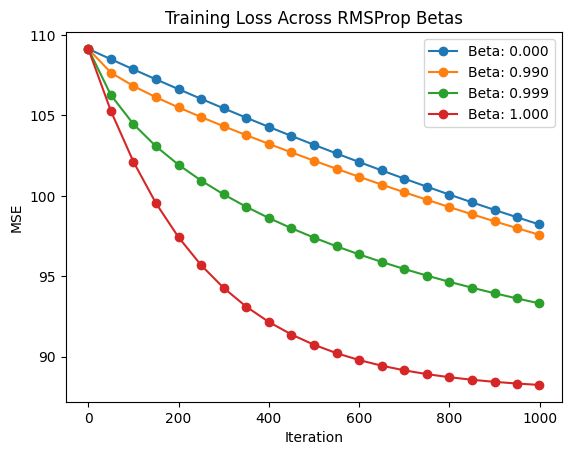

In [22]:
# Plot fit and loss curve
lr = 1e-3
for beta in [0, 0.99, 0.999, 0.999999]:
    (theta_0_gd, theta_1_gd), iter_history, loss_history = run_gradient_descent_rmsprop(x, y, learning_rate=lr, epochs=1000, beta=beta)
    plt.plot(np.array(iter_history), loss_history, marker="o", label=f"Beta: {beta:.3f}")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Training Loss Across RMSProp Betas")
plt.legend()
plt.show()

## Question 7 - (8 points - 4 each)

7(a): What is the difference between $\beta=0$ and $\beta=1$ in RMSProp? It might help if you write out the equation and replace $\beta$ with 0 and 1.

7(b): Does the answer to 7(a) correspond to what you see in the plot above? In terms of the plot, what is the main difference between the red and the blue lines? 

Enter your answer here

7(a) - When $\beta=0$, the learning rate is scaled by the magnitude of the gradient, which normalizes the update so each step is roughly the same size. When $\beta=1$, the learning rate is not impacted by the gradient so it stays constant. 

7(b) - Yes, since the learning rate decays with the square of the gradient, the loss in the blue line does not go down as quickly. But the loss in the red line goes down quicker since the learning rate is not changed. 